In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('./_data/train_imp.csv', index_col=0)
test = pd.read_csv('./_data/test_imp.csv', index_col=0)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Species           114 non-null    object 
 1   Island            114 non-null    object 
 2   ClutchCompletion  114 non-null    object 
 3   CulmenLenth       114 non-null    float64
 4   CulmenDepth       114 non-null    float64
 5   FlipperLenth      114 non-null    int64  
 6   Sex               114 non-null    object 
 7   Delta15N          114 non-null    float64
 8   Delta13C          114 non-null    float64
 9   BodyMass          114 non-null    int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 9.8+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Species           228 non-null    object 
 1   Island            228 non-null    object 
 2   ClutchCompletion  228 non-null    object 
 3   CulmenLenth       228 non-null    float64
 4   CulmenDepth       228 non-null    float64
 5   FlipperLenth      228 non-null    float64
 6   Sex               228 non-null    object 
 7   Delta15N          228 non-null    float64
 8   Delta13C          228 non-null    float64
dtypes: float64(5), object(4)
memory usage: 17.8+ KB


In [5]:
col_names = train.columns
col_names

Index(['Species', 'Island', 'ClutchCompletion', 'CulmenLenth', 'CulmenDepth',
       'FlipperLenth', 'Sex', 'Delta15N', 'Delta13C', 'BodyMass'],
      dtype='object')

In [7]:
train['Species'].value_counts()

Gentoo penguin (Pygoscelis papua)            48
Adelie Penguin (Pygoscelis adeliae)          41
Chinstrap penguin (Pygoscelis antarctica)    25
Name: Species, dtype: int64

In [8]:
train['Sex'].value_counts()

FEMALE    57
MALE      57
Name: Sex, dtype: int64

In [9]:
train['Island'].value_counts()

Biscoe       57
Dream        44
Torgersen    13
Name: Island, dtype: int64

In [10]:
train['ClutchCompletion'].value_counts()

Yes    102
No      12
Name: ClutchCompletion, dtype: int64

### 범주형 데이터 확인

In [10]:
from scipy import stats
from statsmodels.formula.api import ols, glm

In [11]:
Rformula = col_names[-1] +' ~ '+ ' + '.join(col_names[2:-4]) + ' + '+ ' + '.join(col_names[-3:-1])
Rformula

'BodyMass ~ ClutchCompletion + CulmenLenth + CulmenDepth + FlipperLenth + Delta15N + Delta13C'

# 범주형 제외하고 ols 회귀식 구성

In [12]:
categorical = ['Species', 'Island', 'Sex']
numerical = ['ClutchCompletion', 'CulmenLenth', 'CulmenDepth',' FlipperLenth', 'Delta15N', 'Delta13C']

# ols 모델결과 이해하기
https://blog.naver.com/ehdanf1219/222473639256

In [13]:
model = ols(Rformula, data=train)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               BodyMass   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     61.26
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           2.26e-32
Time:                        23:15:22   Log-Likelihood:                -835.77
No. Observations:                 114   AIC:                             1686.
Df Residuals:                     107   BIC:                             1705.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -5722.0312   2127.505     -2.690      0.008   -9939.563   -1504.500
ClutchCompletion[T.Yes]   -49.8216    123.550     -0.403      0.688    -294.745     195.102
CulmenLenth                18.0831     12.155      1.488      0.140      -6.012      42.179
CulmenDepth                57.5530     26.610      2.163      0.033       4.802     110.304
FlipperLenth               38.8411      5.296      7.334      0.000      28.342      49.340
Delta15N                 -249.2685    100.878     -2.471      0.015    -449.247     -49.290
Delta13C                 -101.0476     64.359     -1.570      0.119    -228.631      26.536
==============================================================================
Omnibus:                       17.178   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.684
Skew:                           0.859   Prob(JB):                     3.23e-05
Kurtosis:                       4.185   Cond. No.                     1.26e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# 다중공선성 확인
* https://bkshin.tistory.com/entry/DATA-20-%EB%8B%A4%EC%A4%91%EA%B3%B5%EC%84%A0%EC%84%B1%EA%B3%BC-VIF

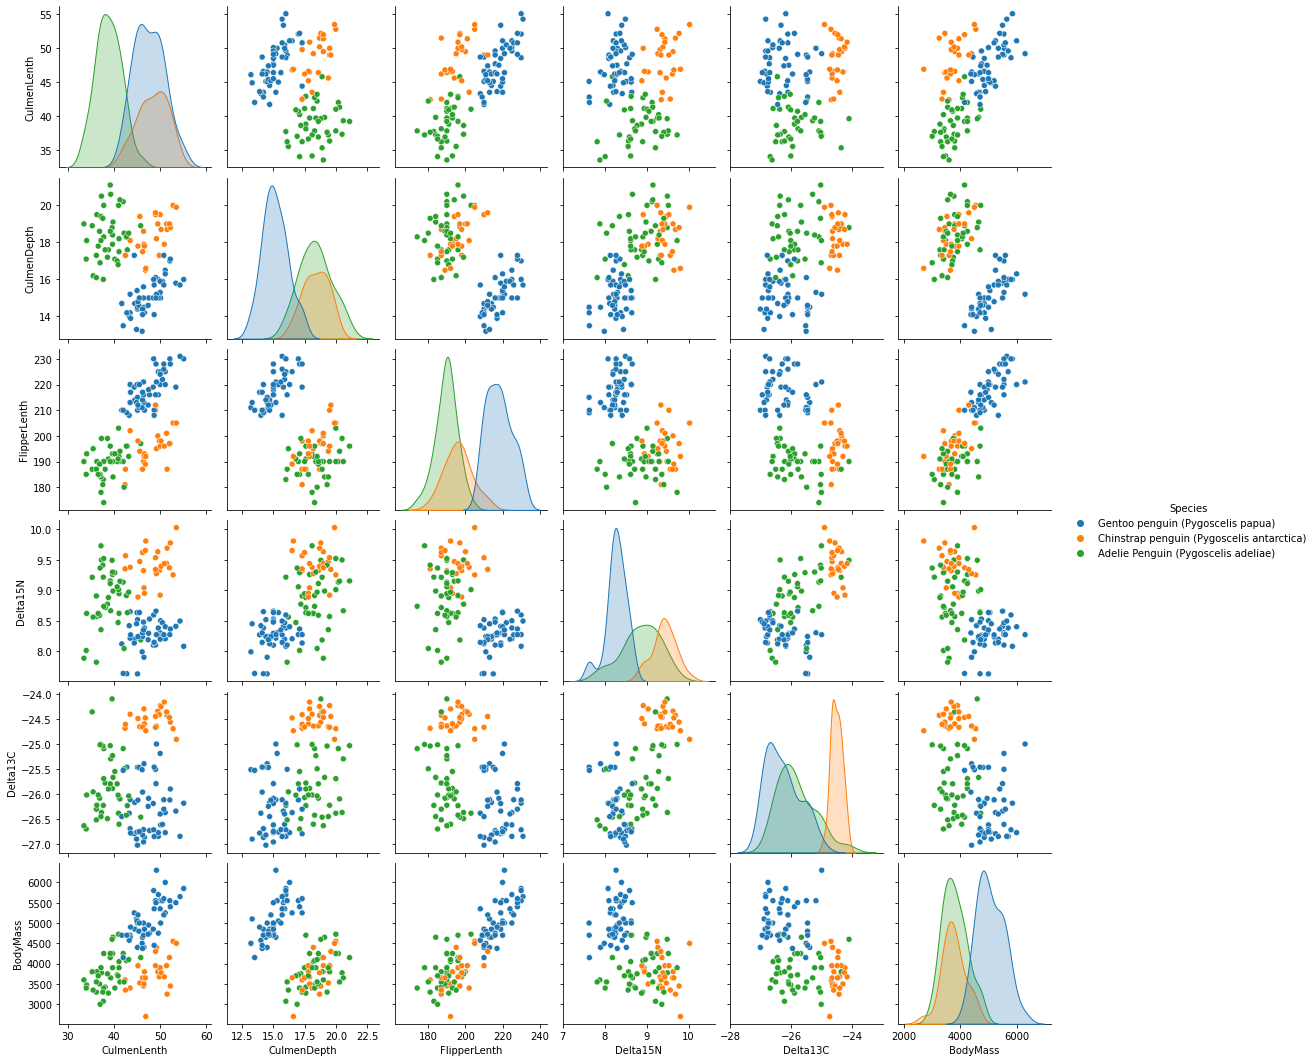

In [14]:
sns.pairplot(train,hue='Species')
plt.show()

# 범주형데이터를 더미로 변경

In [51]:
train_dummies = pd.get_dummies(train, columns=['Species','Island','ClutchCompletion','Sex'])
train_dummies

,CulmenLenth,CulmenDepth,FlipperLenth,Delta15N,Delta13C,BodyMass,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,ClutchCompletion_No,ClutchCompletion_Yes,Sex_FEMALE,Sex_MALE
id,,,,,,,,,,,,,,,,
0,50.0,15.3,220,8.305150,-25.190170,5550,0,0,1,1,0,0,0,1,0,1
1,49.5,19.0,200,9.630740,-24.346840,3800,0,1,0,0,1,0,1,0,0,1
2,45.1,14.4,210,8.519510,-27.018540,4400,0,0,1,1,0,0,0,1,1,0
3,44.5,14.7,214,8.201060,-26.165240,4850,0,0,1,1,0,0,0,1,1,0
4,49.6,16.0,225,8.383240,-26.842720,5700,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,36.6,17.8,185,8.621243,-26.017551,3700,1,0,0,0,0,1,0,1,1,0
110,39.2,18.6,190,9.110060,-25.795490,4250,1,0,0,0,1,0,0,1,0,1
111,43.2,18.5,192,8.970250,-26.036790,4100,1,0,0,0,1,0,0,1,0,1


In [52]:
test_dummies = pd.get_dummies(test, columns=['Species','Island','ClutchCompletion','Sex'])
test_dummies

,CulmenLenth,CulmenDepth,FlipperLenth,Delta15N,Delta13C,Species_Adelie Penguin (Pygoscelis adeliae),Species_Chinstrap penguin (Pygoscelis antarctica),Species_Gentoo penguin (Pygoscelis papua),Island_Biscoe,Island_Dream,Island_Torgersen,ClutchCompletion_No,ClutchCompletion_Yes,Sex_FEMALE,Sex_MALE
id,,,,,,,,,,,,,,,
0,52.0,20.7,210.0,9.43146,-24.68440,0,1,0,0,1,0,0,1,0,1
1,55.9,17.0,228.0,8.31180,-26.35425,0,0,1,1,0,0,0,1,0,1
2,38.9,18.8,190.0,8.36936,-26.11199,1,0,0,0,1,0,0,1,1,0
3,45.2,16.6,191.0,9.62357,-24.78984,0,1,0,0,1,0,0,1,1,0
4,37.9,18.6,172.0,8.38404,-25.19837,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,49.3,19.9,203.0,9.88809,-24.59513,0,1,0,0,1,0,0,1,0,1
224,46.5,14.8,217.0,8.58487,-26.59290,0,0,1,1,0,0,0,1,1,0
225,46.5,13.5,210.0,7.99530,-25.32829,0,0,1,1,0,0,0,1,1,0


In [53]:
train_dummies.rename(columns={'Species_Adelie Penguin (Pygoscelis adeliae)':'Species_Adelie', 'Species_Chinstrap penguin (Pygoscelis antarctica)':'Species_Chinstrap','Species_Gentoo penguin (Pygoscelis papua)':'Species_Gentoo'},inplace=True)
train_dummies.columns

Index(['CulmenLenth', 'CulmenDepth', 'FlipperLenth', 'Delta15N', 'Delta13C',
       'BodyMass', 'Species_Adelie', 'Species_Chinstrap', 'Species_Gentoo',
       'Island_Biscoe', 'Island_Dream', 'Island_Torgersen',
       'ClutchCompletion_No', 'ClutchCompletion_Yes', 'Sex_FEMALE',
       'Sex_MALE'],
      dtype='object')

In [54]:
test_dummies.rename(columns={'Species_Adelie Penguin (Pygoscelis adeliae)':'Species_Adelie', 'Species_Chinstrap penguin (Pygoscelis antarctica)':'Species_Chinstrap','Species_Gentoo penguin (Pygoscelis papua)':'Species_Gentoo'},inplace=True)
test_dummies.columns

Index(['CulmenLenth', 'CulmenDepth', 'FlipperLenth', 'Delta15N', 'Delta13C',
       'Species_Adelie', 'Species_Chinstrap', 'Species_Gentoo',
       'Island_Biscoe', 'Island_Dream', 'Island_Torgersen',
       'ClutchCompletion_No', 'ClutchCompletion_Yes', 'Sex_FEMALE',
       'Sex_MALE'],
      dtype='object')

In [56]:
train_dummies

,CulmenLenth,CulmenDepth,FlipperLenth,Delta15N,Delta13C,BodyMass,Species_Adelie,Species_Chinstrap,Species_Gentoo,Island_Biscoe,Island_Dream,Island_Torgersen,ClutchCompletion_No,ClutchCompletion_Yes,Sex_FEMALE,Sex_MALE
id,,,,,,,,,,,,,,,,
0,50.0,15.3,220,8.305150,-25.190170,5550,0,0,1,1,0,0,0,1,0,1
1,49.5,19.0,200,9.630740,-24.346840,3800,0,1,0,0,1,0,1,0,0,1
2,45.1,14.4,210,8.519510,-27.018540,4400,0,0,1,1,0,0,0,1,1,0
3,44.5,14.7,214,8.201060,-26.165240,4850,0,0,1,1,0,0,0,1,1,0
4,49.6,16.0,225,8.383240,-26.842720,5700,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,36.6,17.8,185,8.621243,-26.017551,3700,1,0,0,0,0,1,0,1,1,0
110,39.2,18.6,190,9.110060,-25.795490,4250,1,0,0,0,1,0,0,1,0,1
111,43.2,18.5,192,8.970250,-26.036790,4100,1,0,0,0,1,0,0,1,0,1


In [63]:
train_std = train_dummies.loc[:,train_dummies.columns[:5]]
train_std

,CulmenLenth,CulmenDepth,FlipperLenth,Delta15N,Delta13C
id,,,,,
0,50.0,15.3,220,8.305150,-25.190170
1,49.5,19.0,200,9.630740,-24.346840
2,45.1,14.4,210,8.519510,-27.018540
3,44.5,14.7,214,8.201060,-26.165240
4,49.6,16.0,225,8.383240,-26.842720
...,...,...,...,...,...
109,36.6,17.8,185,8.621243,-26.017551
110,39.2,18.6,190,9.110060,-25.795490
111,43.2,18.5,192,8.970250,-26.036790


In [64]:
test_std = test_dummies.loc[:,test_dummies.columns[:5]]
test_std

,CulmenLenth,CulmenDepth,FlipperLenth,Delta15N,Delta13C
id,,,,,
0,52.0,20.7,210.0,9.43146,-24.68440
1,55.9,17.0,228.0,8.31180,-26.35425
2,38.9,18.8,190.0,8.36936,-26.11199
3,45.2,16.6,191.0,9.62357,-24.78984
4,37.9,18.6,172.0,8.38404,-25.19837
...,...,...,...,...,...
223,49.3,19.9,203.0,9.88809,-24.59513
224,46.5,14.8,217.0,8.58487,-26.59290
225,46.5,13.5,210.0,7.99530,-25.32829


In [65]:
#스케일링
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
train_std = stdsc.fit_transform(train_std)
test_std = stdsc.transform(test_std)

In [92]:
X_train = pd.concat([pd.DataFrame(train_std),train_dummies.loc[:,train_dummies.columns[6:]]], axis=1)
X_test = pd.concat([pd.DataFrame(test_std),test_dummies.loc[:,test_dummies.columns[5:]]], axis=1)

In [93]:
X_train

,0,1,2,3,4,Species_Adelie,Species_Chinstrap,Species_Gentoo,Island_Biscoe,Island_Dream,Island_Torgersen,ClutchCompletion_No,ClutchCompletion_Yes,Sex_FEMALE,Sex_MALE
0,1.016685,-0.887255,1.161653,-0.774837,0.635810,0,0,1,1,0,0,0,1,0,1
1,0.922318,1.027037,-0.209242,1.599272,1.633278,0,1,0,0,1,0,1,0,0,1
2,0.091884,-1.352893,0.476205,-0.390922,-1.526736,0,0,1,1,0,0,0,1,1,0
3,-0.021357,-1.197680,0.750384,-0.961260,-0.517476,0,0,1,1,0,0,0,1,1,0
4,0.941191,-0.525091,1.504376,-0.634979,-1.318781,0,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,-1.512363,0.406186,-1.237413,-0.208720,-0.342793,1,0,0,0,0,1,0,1,1,0
110,-1.021652,0.820087,-0.894689,0.666743,-0.080146,1,0,0,0,1,0,0,1,0,1
111,-0.266712,0.768349,-0.757600,0.416346,-0.365549,1,0,0,0,1,0,0,1,0,1
112,0.431607,-0.214666,-0.757600,1.912963,1.171393,0,1,0,0,1,0,1,0,1,0


In [94]:
X_test

,0,1,2,3,4,Species_Adelie,Species_Chinstrap,Species_Gentoo,Island_Biscoe,Island_Dream,Island_Torgersen,ClutchCompletion_No,ClutchCompletion_Yes,Sex_FEMALE,Sex_MALE
0,1.394155,1.906577,0.476205,1.242365,1.234021,0,1,0,0,1,0,0,1,0,1
1,2.130221,-0.007715,1.710011,-0.762927,-0.741032,0,0,1,1,0,0,0,1,0,1
2,-1.078273,0.923562,-0.894689,-0.659838,-0.454493,1,0,0,0,1,0,0,1,1,0
3,0.110758,-0.214666,-0.826144,1.586431,1.109310,0,1,0,0,1,0,0,1,1,0
4,-1.267007,0.820087,-2.128494,-0.633546,0.626111,1,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.884571,1.492676,-0.003608,2.060182,1.339607,0,1,0,0,1,0,0,1,0,1
224,0.356113,-1.145943,0.956019,-0.273863,-1.023301,0,0,1,1,0,0,0,1,1,0
225,0.356113,-1.818532,0.476205,-1.329773,0.472446,0,0,1,1,0,0,0,1,1,0
226,1.111053,1.337463,-0.140697,1.912981,1.180796,0,1,0,0,1,0,0,1,0,1


In [95]:
X_train.rename(columns={0:'CulmenLenth', 1:'CulmenDepth', 2:'FlipperLenth', 3:'Delta15N', 4:'Delta13C'}, inplace=True)
X_test.rename(columns={0:'CulmenLenth', 1:'CulmenDepth', 2:'FlipperLenth', 3:'Delta15N', 4:'Delta13C'},inplace=True)

In [73]:
from pycaret.regression import * 

In [116]:
numeric_features = ['CulmenDepth','FlipperLenth', 'Delta15N']
categorical_features = ['Species_Adelie', 'Species_Chinstrap',
       'Island_Biscoe', 'Island_Dream',
       'ClutchCompletion_Yes',
       'Sex_MALE']
ignor_features = ['CulmenLenth', 'Delta13C','Species_Gentoo','Island_Torgersen','ClutchCompletion_No','Sex_FEMALE']

In [98]:
SEED = 32

In [117]:
reg = setup(data = pd.concat([X_train,train_dummies['BodyMass']],axis=1), target = 'BodyMass', session_id=SEED,
           numeric_features=numeric_features,categorical_features=categorical_features,ignore_features=ignor_features) 

,Description,Value
0,session_id,32
1,Target,BodyMass
2,Original Data,"(114, 16)"
3,Missing Values,False
4,Numeric Features,3
5,Categorical Features,6
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(79, 9)"


In [ ]:
top3 = compare_models(exclude = ['ransac'], n_select = 3, fold=5, sort='RMSE')

IntProgress(value=0, description='Processing: ', max=94)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:04:24
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Least Angle Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,250.3330,100939.6460,306.5505,0.8233,0.0759,0.0612,0.0100
lr,Linear Regression,251.7282,101644.0438,307.5784,0.8220,0.0762,0.0616,0.0100
ridge,Ridge Regression,262.4746,107653.0029,316.7013,0.8130,0.0791,0.0645,0.0080
en,Elastic Net,303.6190,146002.3770,363.7368,0.7667,0.0893,0.0746,0.0080


In [101]:
tuned_top3 = [tune_model(i) for i in top3]
blender = blend_models(tuned_top3)
stacker = stack_models(tuned_top3)
best_auc_model = automl(optimize = 'RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,234.7093,71668.3424,267.7094,0.8820,0.0644,0.0555
1,267.8441,109608.0160,331.0710,0.8800,0.0841,0.0636
2,412.4940,237010.7414,486.8375,0.5926,0.1219,0.1026
3,516.0528,338108.7567,581.4712,0.7243,0.1607,0.1410
4,128.9524,24451.0827,156.3684,0.9072,0.0318,0.0267
5,338.9893,147534.1735,384.1018,0.5886,0.0941,0.0813
6,142.6270,44515.8769,210.9879,0.8988,0.0623,0.0383
7,263.2418,95028.7677,308.2674,0.7050,0.0686,0.0610
8,254.2068,88711.0859,297.8441,0.8111,0.0750,0.0607
9,162.4276,27651.3710,166.2870,0.9155,0.0420,0.0408


In [102]:
finalized_model = finalize_model(best_auc_model)

In [103]:
best_auc_model

Lasso(alpha=0.64, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=32,
      selection='cyclic', tol=0.0001, warm_start=False)

In [104]:
predictions = predict_model(data=X_test, estimator=finalized_model)
predictions

,CulmenLenth,CulmenDepth,FlipperLenth,Delta15N,Delta13C,Species_Adelie,Species_Chinstrap,Species_Gentoo,Island_Biscoe,Island_Dream,Island_Torgersen,ClutchCompletion_No,ClutchCompletion_Yes,Sex_FEMALE,Sex_MALE,Label
0,1.394155,1.906577,0.476205,1.242365,1.234021,0,1,0,0,1,0,0,1,0,1,4317.097656
1,2.130221,-0.007715,1.710011,-0.762927,-0.741032,0,0,1,1,0,0,0,1,0,1,5596.053711
2,-1.078273,0.923562,-0.894689,-0.659838,-0.454493,1,0,0,0,1,0,0,1,1,0,3540.160645
3,0.110758,-0.214666,-0.826144,1.586431,1.109310,0,1,0,0,1,0,0,1,1,0,3420.780029
4,-1.267007,0.820087,-2.128494,-0.633546,0.626111,1,0,0,1,0,0,1,0,1,0,3347.767578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.884571,1.492676,-0.003608,2.060182,1.339607,0,1,0,0,1,0,0,1,0,1,4151.709473
224,0.356113,-1.145943,0.956019,-0.273863,-1.023301,0,0,1,1,0,0,0,1,1,0,4789.881836
225,0.356113,-1.818532,0.476205,-1.329773,0.472446,0,0,1,1,0,0,0,1,1,0,4704.046875
226,1.111053,1.337463,-0.140697,1.912981,1.180796,0,1,0,0,1,0,0,1,0,1,4133.944336


In [106]:
submission = pd.read_csv('./_data/sample_submission.csv', index_col=0)

In [107]:
submission['Body Mass (g)'] = predictions['Label']
submission

,Body Mass (g)
id,
0,4317.097656
1,5596.053711
2,3540.160645
3,3420.780029
4,3347.767578
...,...
223,4151.709473
224,4789.881836
225,4704.046875


In [108]:
submission.to_csv('./submission2.csv')

* PUBLIC 
    * 29위 SCORE 289.31928